# Overview Materi

Jelaskan secara singkat perbedaan antara bagging dan boosting menurut pemahamanmu!

# Import Data & Libraries

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm

In [21]:
X, y = make_classification(
    n_samples=500, n_features=10,
    n_informative=5, n_redundant=2,
    n_clusters_per_class=1, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

Ukuran data latih: (400, 10)
Ukuran data uji: (100, 10)


In [24]:
class BaggingClassifierScratch:
    def __init__(self, base_estimator, n_estimators=10):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.models = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.models = []
        for _ in range(self.n_estimators):
            # Sampling bootstrap
            idx = np.random.choice(n_samples, n_samples, replace=True)
            X_sample, y_sample = X[idx], y[idx]

            model = DecisionTreeClassifier(max_depth=None)
            model.fit(X_sample, y_sample)
            self.models.append(model)

    def predict(self, X):
        preds = np.array([model.predict(X) for model in self.models])
        preds_final = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=preds)
        return preds_final

bagging_model = BaggingClassifierScratch(base_estimator=DecisionTreeClassifier(), n_estimators=15)
bagging_model.fit(X_train, y_train)
y_pred_bag = bagging_model.predict(X_test)

# Evaluasi
acc_bag = accuracy_score(y_test, y_pred_bag)
print(f"Akurasi Bagging dari nol: {acc_bag:.4f}")

Akurasi Bagging dari nol: 0.9900


# Bagging from Scratch

## Random Forest Classifier - Sklearn

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi Random Forest (Sklearn): {acc_rf:.4f}")

Akurasi Random Forest (Sklearn): 0.9900


## Random Forest from Scratch
Source: https://www.youtube.com/watch?v=kFwe2ZZU7yw

In [26]:
class BaggingClassifierScratch:
    def __init__(self, base_estimator, n_estimators=10):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.models = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.models = []
        for _ in range(self.n_estimators):

            idx = np.random.choice(n_samples, n_samples, replace=True)
            X_sample, y_sample = X[idx], y[idx]

            model = DecisionTreeClassifier(max_depth=None)
            model.fit(X_sample, y_sample)
            self.models.append(model)

    def predict(self, X):
        preds = np.array([model.predict(X) for model in self.models])
        preds_final = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=preds)
        return preds_final

## Predict Using Random Forest

In [27]:
bagging_model = BaggingClassifierScratch(base_estimator=DecisionTreeClassifier(), n_estimators=15)
bagging_model.fit(X_train, y_train)
y_pred_bag = bagging_model.predict(X_test)

acc_bag = accuracy_score(y_test, y_pred_bag)
print(f"Akurasi Bagging dari nol: {acc_bag:.4f}")


Akurasi Bagging dari nol: 0.9900


# Boosting From Scratch

## Gradient Boosting Classifier - Sklearn

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"Akurasi Gradient Boosting (Sklearn): {acc_gb:.4f}")

Akurasi Gradient Boosting (Sklearn): 0.9900


## Gradient Boosting from Scratch with Decision Tree
Source: https://www.youtube.com/watch?v=Pq2mmJxjs1o

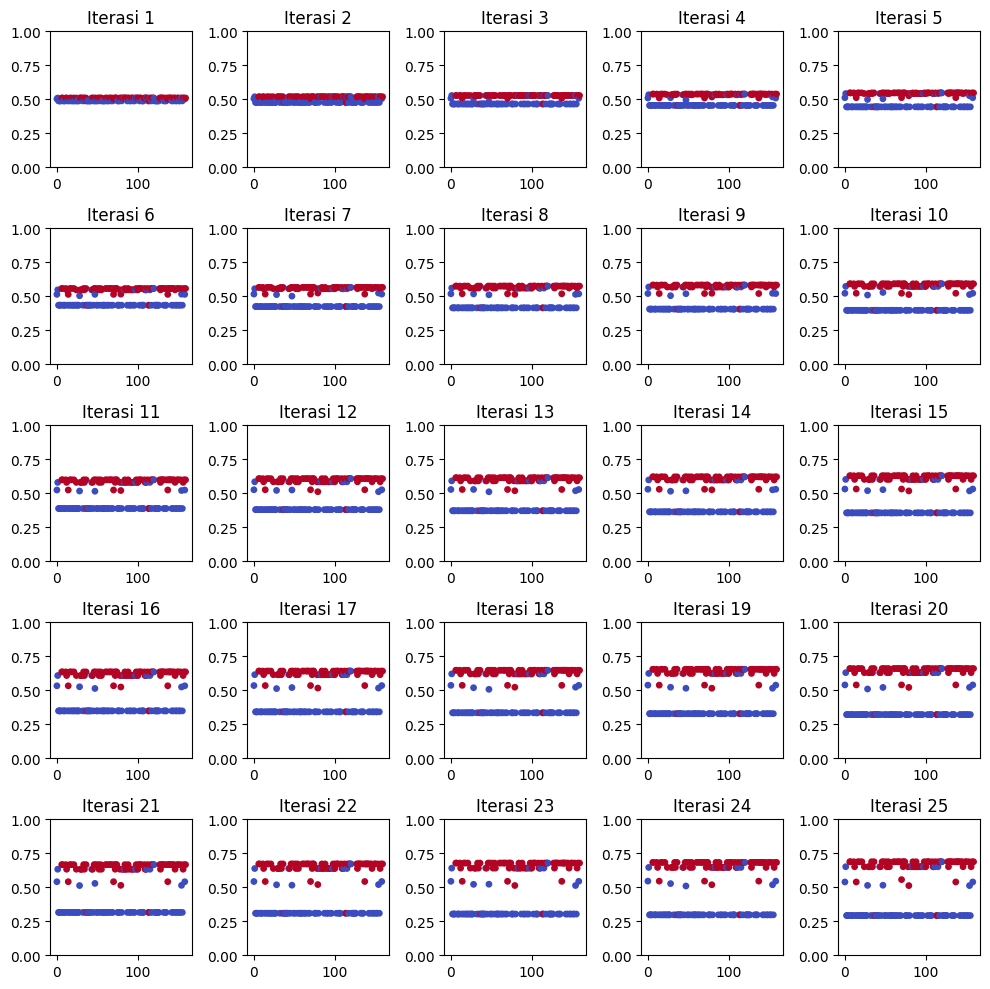

Akurasi Gradient Boosting (From Scratch): 0.825


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class gradientBoostingClassifier:
    def __init__(self, lr=0.1, n_estimators=25, base_learner=DecisionTreeRegressor):
        self.lr = lr
        self.n_estimators = n_estimators
        self.base_learner = base_learner
        self.base_models = []

    def fit(self, X, y, **params):
        self.base_models = []

        Fm = np.zeros_like(y, dtype=float)

        fig, axs = plt.subplots(5, 5, figsize=(10, 10))
        axs = axs.flatten()

        for i in range(self.n_estimators):
            r_i = y - sigmoid(Fm)

            h_i = self.base_learner(**params)
            h_i.fit(X, r_i)
            self.base_models.append(h_i)

            Fm += self.lr * h_i.predict(X)

            if i < 25:
                ax = axs[i]
                ax.scatter(range(len(y)), sigmoid(Fm), c=y, cmap='coolwarm', s=15)
                ax.set_title(f'Iterasi {i+1}')
                ax.set_ylim(0, 1)

        plt.tight_layout()
        plt.show()

    def predict(self, X):
        Fm = np.zeros(X.shape[0])
        for h_i in self.base_models:
            Fm += self.lr * h_i.predict(X)
        probs = sigmoid(Fm)
        return (probs >= 0.5).astype(int)

X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0,
    n_informative=2, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = gradientBoostingClassifier(lr=0.1, n_estimators=25)
gb_model.fit(X_train, y_train, max_depth=2)

y_pred = gb_model.predict(X_test)
print("Akurasi Gradient Boosting (From Scratch):", accuracy_score(y_test, y_pred))


## Predict Using Gradient Boosting

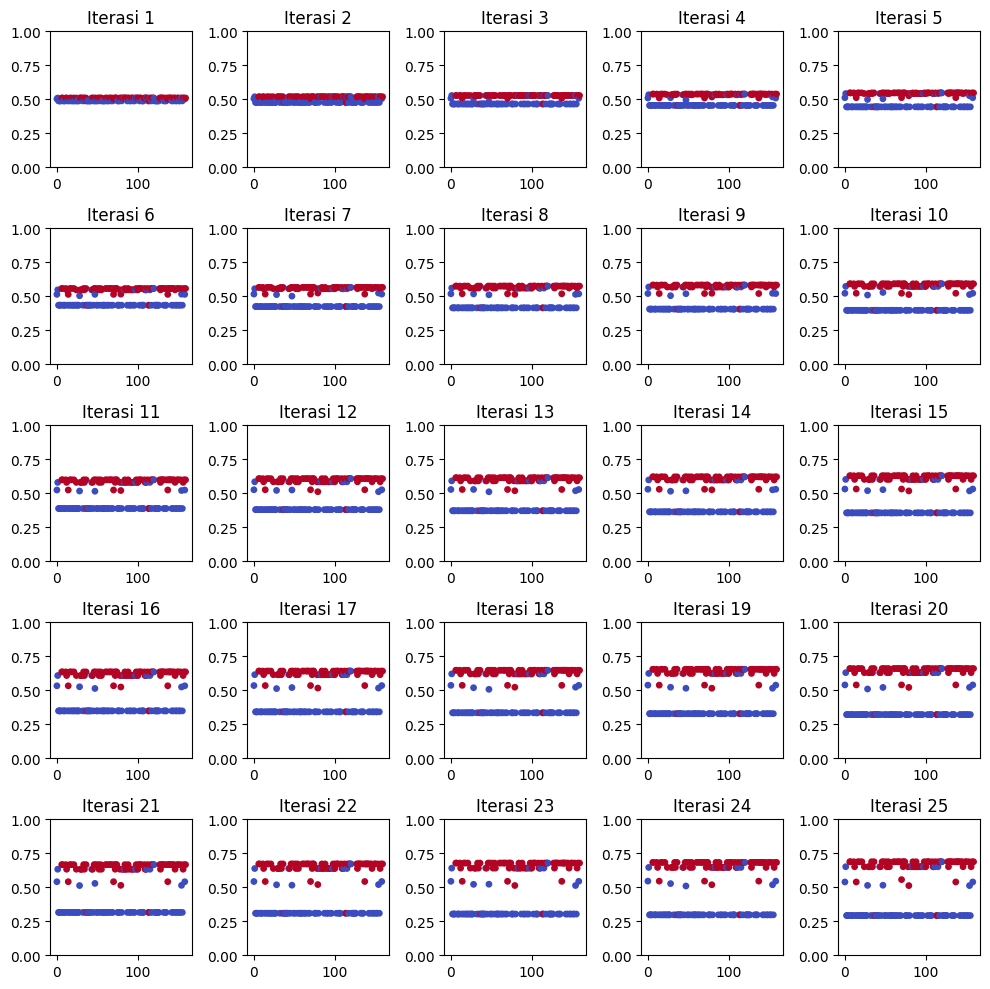

In [33]:
gb_model = gradientBoostingClassifier(lr=0.1, n_estimators=25)
gb_model.fit(X_train, y_train, max_depth=2)

In [34]:
preds = gb_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Akurasi Gradient Boosting (From Scratch):", accuracy_score(y_test, preds))

Akurasi Gradient Boosting (From Scratch): 0.825


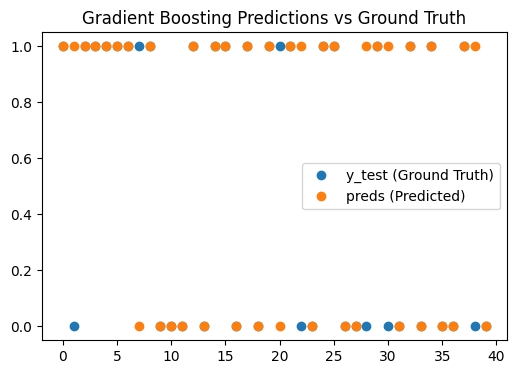

In [35]:
_, ax = plt.subplots(1, 1, figsize=(6,4))
plt.title('Gradient Boosting Predictions vs Ground Truth')
ax.plot(y_test, 'o', label='y_test (Ground Truth)')
ax.plot(preds, 'o', label='preds (Predicted)')
ax.legend()
plt.show()